<a href="https://colab.research.google.com/github/sengamali/Fraud_detection/blob/main/Frauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import NearMiss               # Undersampling
from imblearn.over_sampling import RandomOverSampler       # Oversampling
from imblearn.combine import SMOTETomek                    # Both Undersampling & Oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df=pd.read_csv('/content/transactiondataset.csv')
print(df.shape)
df.head()

(151799, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Checking if there are any null values in our dataset
df.isnull().sum()



step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df[df['isFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142088,11,CASH_OUT,12461.00,C938980312,12461.00,0.0,C621014131,27964.11,40425.11,1.0,0.0
146627,12,TRANSFER,19472.00,C1101705841,19472.00,0.0,C925285469,0.00,0.00,1.0,0.0
146628,12,CASH_OUT,19472.00,C1205151454,19472.00,0.0,C664770316,0.00,19472.00,1.0,0.0
151657,12,TRANSFER,3964129.99,C576568419,3964129.99,0.0,C1571546632,0.00,0.00,1.0,0.0


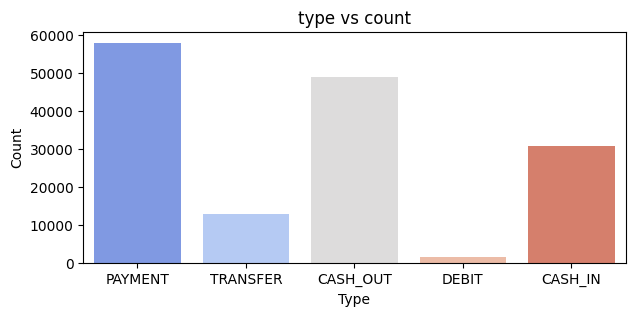

In [ ]:
# Countplot of 'type'
plt.figure(figsize=(7,3))
plt.title('type vs count')
sns.countplot(data=df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

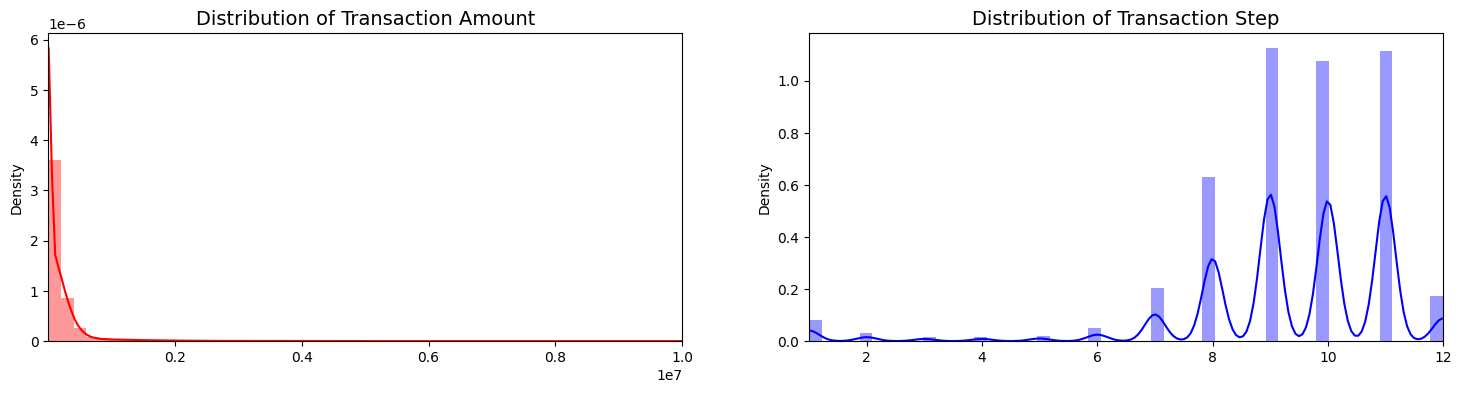

In [ ]:
# Plotting subplot for amount and time column
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['amount'].values
time_val = df['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

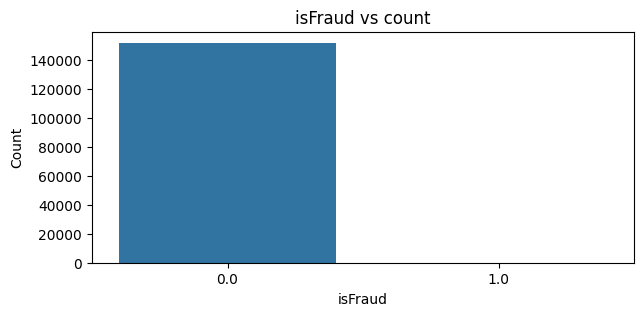

In [ ]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

In [ ]:
df['isFraud'].value_counts()

0.0    151667
1.0       131
Name: isFraud, dtype: int64

In [ ]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)
numerical=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

No Frauds: 99.91304290542098
Frauds: 0.08629832871099283


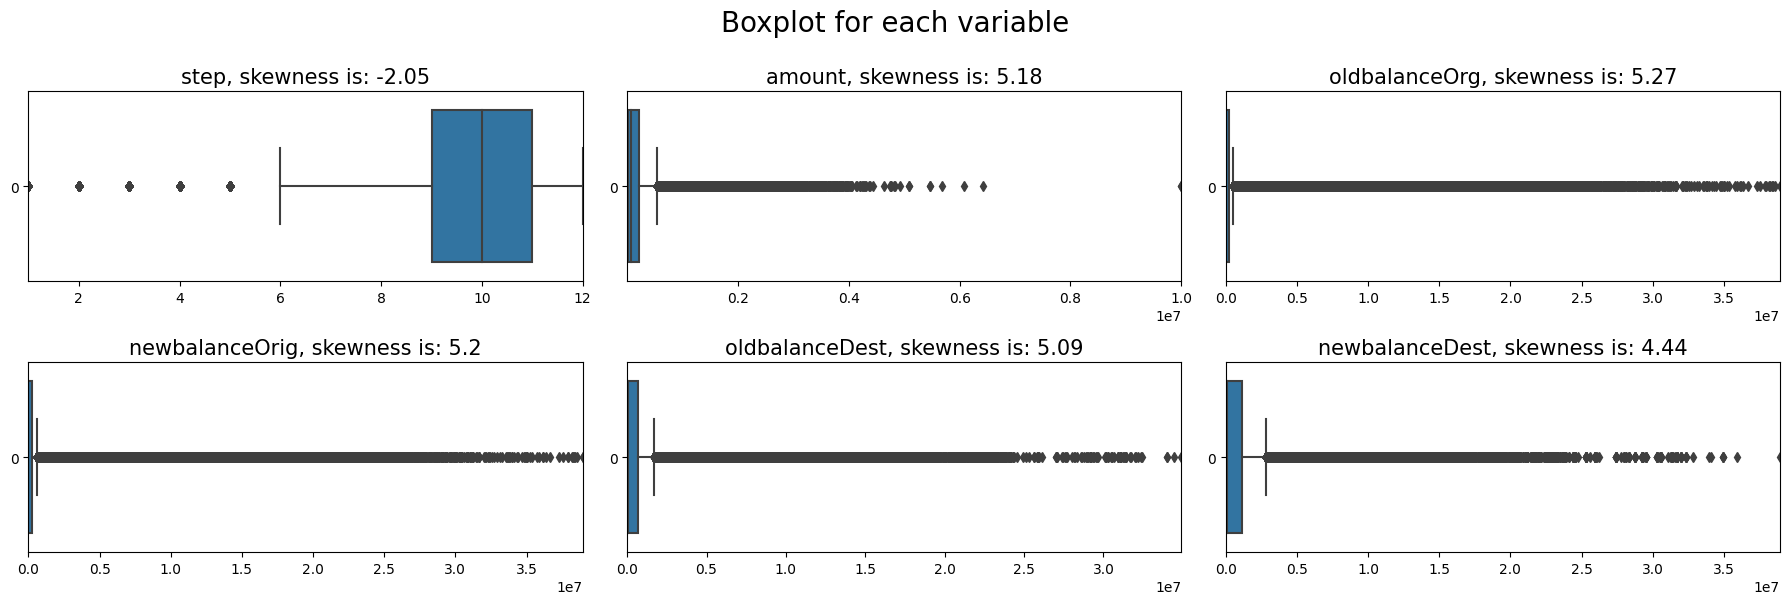

In [ ]:
def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,3,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

In [ ]:
# Checking nameOrig,nameDest column
nameOrig=df['nameOrig'].unique()
print("Unique in nameOrig:",len(nameOrig))
print(nameOrig)

nameDest=df['nameDest'].unique()
print("Unique in nameDest:",len(nameDest))
print(nameDest)

Unique in nameOrig: 151796
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1159606163' 'C1714697587'
 'C1069154168']
Unique in nameDest: 74710
['M1979787155' 'M2044282225' 'C553264065' ... 'M2054942544' 'M200223521'
 nan]


In [ ]:
df['isFlaggedFraud'].value_counts()

0.0    151798
Name: isFlaggedFraud, dtype: int64

In [ ]:
# Dropping columns that are not needed
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
#Applying onehot encoding on type column
df=pd.get_dummies(data=df,columns=['type'],drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0


In [ ]:
# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
scale=RobustScaler()
for feature in numerical:
    df[feature]=scale.fit_transform(df[feature].values.reshape(-1, 1))
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-4.5,-0.242477,0.767349,0.708424,-0.046067,-0.083257,0.0,0,0,1,0
1,-4.5,-0.280110,0.006434,0.085670,-0.046067,-0.083257,0.0,0,0,1,0
2,-4.5,-0.288053,-0.101238,0.000000,-0.046067,-0.083257,1.0,0,0,0,1
3,-4.5,-0.288053,-0.101238,0.000000,-0.015231,-0.083257,1.0,1,0,0,0
4,-4.5,-0.233849,0.110207,0.132079,-0.046067,-0.083257,0.0,0,0,1,0


In [30]:
# Splitting our data into independent and dependent features
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
x.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [ ]:
df[df['isFraud']==1]


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,-4.5,-0.288053,-0.101238,0.0,-0.046067,-0.083257,1.0,0,0,0,1
3,-4.5,-0.288053,-0.101238,0.0,-0.015231,-0.083257,1.0,1,0,0,0
251,-4.5,-0.275667,-0.087822,0.0,-0.046067,-0.083257,1.0,0,0,0,1
252,-4.5,-0.275667,-0.087822,0.0,-0.007922,-0.083257,1.0,1,0,0,0
680,-4.5,-0.193930,0.000705,0.0,-0.046067,-0.083257,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
142088,0.5,-0.230108,-0.038478,0.0,-0.005357,-0.047195,1.0,1,0,0,0
146627,1.0,-0.197026,-0.002647,0.0,-0.046067,-0.083257,1.0,0,0,0,1
146628,1.0,-0.197026,-0.002647,0.0,-0.046067,-0.065886,1.0,1,0,0,0
151657,1.0,18.416365,20.157255,0.0,-0.046067,-0.083257,1.0,0,0,0,1


In [42]:
specific_entry = 151797

# Select rows up to the specific entry
sx = x.iloc[:specific_entry]
sy = y.iloc[:specific_entry]


In [43]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(sx,sy)
print(model.feature_importances_)

[0.06694526 0.27193732 0.23320588 0.06096947 0.17202624 0.18522333
 0.00534094 0.         0.         0.00435155]


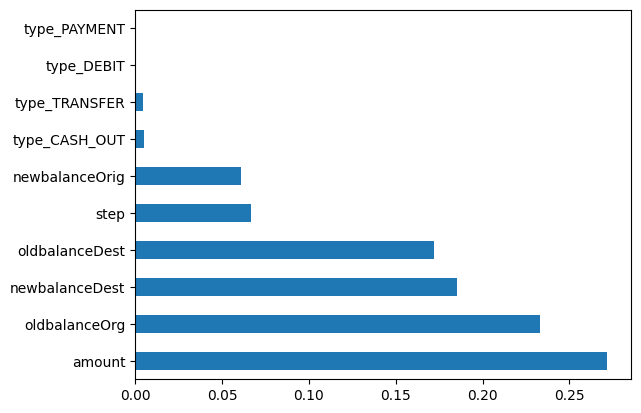

In [44]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [54]:
# Doing train_test_split
X_train,X_test,y_train,y_test=train_test_split(sx,sy,train_size=0.7)
# Applying StratifiedKFold
skf=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [55]:
model1=LogisticRegression()
param={'C':10.0 **np.arange(-1,2)}
lrs=RandomizedSearchCV(model1,param,cv=skf,n_jobs=-1,scoring='accuracy')
lrs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [56]:
y_pred=lrs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[45492     1]
 [   42     5]]
0.9990557751427317
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45493
         1.0       0.83      0.11      0.19        47

    accuracy                           1.00     45540
   macro avg       0.92      0.55      0.59     45540
weighted avg       1.00      1.00      1.00     45540

